In [1]:
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict, validation_curve

from sklearn.metrics import classification_report

from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
clf = GaussianNB()
y_pred = cross_val_predict(clf, X, y, cv=10)
print('Gaussian Naive Bayes:')
print(classification_report(y, y_pred, target_names=target_names))

Gaussian Naive Bayes:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.92      0.94      0.93        50
  virginica       0.94      0.92      0.93        50

avg / total       0.95      0.95      0.95       150



In [4]:
print('k nearest neighbors (k = 2):')
clf = KNeighborsClassifier(n_neighbors=3)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

k nearest neighbors (k = 2):
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.96      0.94      0.95        50
  virginica       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



In [5]:
ks = range(1, 50)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, 'n_neighbors', param_range=ks, cv=10)

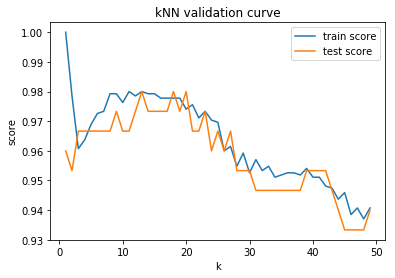

In [7]:
import numpy as np
import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title('kNN validation curve')

plt.xlabel('k')
plt.ylabel('score')

plt.plot(ks, train_scores_mean, label='train score')
plt.plot(ks, test_scores_mean, label='test score')
plt.legend(loc='best')

plt.show()